## DataScienceMasters_Feature Engineering-3_Assignment

### Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

**Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.**

**Min-Max Scaling:**

Min-Max scaling, also known as normalization, is a data preprocessing technique used to transform numerical features into a specific range. The purpose is to ensure that all features contribute equally to the analysis and prevent the dominance of features with larger scales. The formula for Min-Max scaling is:

$[ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}]$

where:
- $(X)$ is the original feature value.
- $(X_{\text{min}})$ is the minimum value of the feature.
- $(X_{\text{max}})$ is the maximum value of the feature.

The resulting scaled values lie in the range [0, 1].


**Benefits of Min-Max Scaling:**
- Ensures that features with different scales contribute equally to machine learning models.
- Useful for algorithms that rely on distance measures, such as k-nearest neighbors or clustering algorithms.

**Note:**
Min-Max scaling should be applied separately to the training and testing datasets to avoid data leakage. The scaler is fit on the training data and then applied to both the training and testing datasets.

**Example: Applying Min-Max Scaling in Python:**

Let's consider a dataset with a numerical feature, "Income," where the income values range from $20,000 to $100,000. We want to apply Min-Max scaling to bring these values into the range [0, 1].


In this example, the "Income" values are scaled to the range [0, 1]. The minimum value (20,000) is scaled to 0, the maximum value (100,000) is scaled to 1, and intermediate values are scaled proportionally between 0 and 1.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a sample dataset
data = {'Income': [20000, 50000, 75000, 100000]}
df = pd.DataFrame(data)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the "Income" feature
df['Income_Scaled'] = scaler.fit_transform(df[['Income']])

# Display the original and scaled dataset
print(df)


C:\Users\inare\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\inare\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


   Income  Income_Scaled
0   20000         0.0000
1   50000         0.3750
2   75000         0.6875
3  100000         1.0000


### Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

**Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.**

**Unit Vector Scaling:**

Unit Vector scaling, also known as vector normalization or "L2 normalization," is a feature scaling technique that transforms numerical features by dividing each feature's values by the Euclidean norm of the feature vector. The formula for Unit Vector scaling is:

$[ X_{\text{scaled}} = \frac{X}{\|X\|}]$

where:
- $(X)$ is the original feature vector.
- $(|X\|)$ is the Euclidean norm (magnitude) of the feature vector.

The resulting scaled vector has a length (magnitude) of 1.

**Differences from Min-Max Scaling:**
- Min-Max scaling scales features to a specific range (e.g., [0, 1]), while Unit Vector scaling normalizes the entire feature vector.
- Min-Max scaling considers the minimum and maximum values of each feature independently, while Unit Vector scaling considers the overall vector magnitude.

**Benefits of Unit Vector Scaling:**
- Ensures that all features contribute equally to machine learning models, regardless of their scales.
- Useful when the direction of the feature vector is more important than the specific scale of individual features.

**Note:**
The `Normalizer` in scikit-learn allows for customization of the normalization method (L1 or L2 normalization). In this example, L2 normalization is applied.

**Example: Applying Unit Vector Scaling in Python:**

Let's consider a dataset with two numerical features, "Height" and "Weight." We want to apply Unit Vector scaling to normalize the feature vector.

In this example, the "Height" and "Weight" values are scaled using Unit Vector scaling. Each row in the resulting columns "Height_Scaled" and "Weight_Scaled" represents a normalized vector with a magnitude of 1.

In [2]:
from sklearn.preprocessing import Normalizer

# Create a sample dataset
data = {'Height': [160, 175, 180], 'Weight': [55, 70, 80]}
df = pd.DataFrame(data)

# Initialize Normalizer with L2 normalization
normalizer = Normalizer(norm='l2')

# Apply Unit Vector scaling to the "Height" and "Weight" features
df[['Height_Scaled', 'Weight_Scaled']] = normalizer.fit_transform(df)

# Display the original and scaled dataset
print(df)


   Height  Weight  Height_Scaled  Weight_Scaled
0     160      55       0.945687       0.325080
1     175      70       0.928477       0.371391
2     180      80       0.913812       0.406138


### Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

**Principal Component Analysis (PCA):**

PCA, or Principal Component Analysis, is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation while retaining as much of the original variance as possible. It achieves this by identifying the principal components, which are linear combinations of the original features. The first principal component captures the most variance, followed by the second, and so on.

**Steps of PCA:**
1. **Standardize the Data:** Ensure that the data is centered (mean of each feature is zero) and has unit variance.
2. **Compute Covariance Matrix:** Calculate the covariance matrix of the standardized data.
3. **Compute Eigenvectors and Eigenvalues:** Find the eigenvectors and eigenvalues of the covariance matrix.
4. **Sort Eigenvectors:** Sort the eigenvectors based on their corresponding eigenvalues in descending order.
5. **Select Principal Components:** Choose the top $(k)$ eigenvectors to form the new feature space (where \(k\) is the desired lower dimensionality).
6. **Project Data:** Project the original data onto the selected principal components to obtain the lower-dimensional representation.


**Benefits of PCA:**
- Reduces dimensionality, which is useful for visualizing high-dimensional data.
- Removes multicollinearity (correlation) between features.
- Retains most of the variability in the data.

**Note:**
The number of principal components to retain $(k)$ can be chosen based on the desired level of explained variance. The `explained_variance_ratio_` attribute of the PCA object provides the proportion of variance explained by each principal component.

**Example: Applying PCA in Python:**

Let's consider a dataset with three numerical features: "Height," "Weight," and "Age." We will apply PCA to reduce the dimensionality to two principal components.

In this example, the original dataset with three features is transformed into two principal components. These components capture the most significant information in the data while reducing its dimensionality.

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create a sample dataset
data = {'Height': [160, 175, 180], 'Weight': [55, 70, 80], 'Age': [25, 30, 35]}
df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df)

# Apply PCA with 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standardized)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the original and PCA-transformed dataset
print(df)
print(df_pca)


   Height  Weight  Age
0     160      55   25
1     175      70   30
2     180      80   35
   Principal Component 1  Principal Component 2
0               2.248835              -0.107552
1              -0.319703               0.279199
2              -1.929132              -0.171646


### Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

**Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.**

**Relationship between PCA and Feature Extraction:**

PCA (Principal Component Analysis) and Feature Extraction are closely related concepts in the context of dimensionality reduction. Feature extraction involves transforming the original features into a new set of features, often with reduced dimensionality, while retaining the essential information from the original data. PCA is a specific technique used for feature extraction that identifies the principal components, which are linear combinations of the original features capturing the most variance.

**How PCA is Used for Feature Extraction:**

1. **Identifying Principal Components:** PCA identifies the principal components (eigenvectors) that represent the directions of maximum variance in the data.

2. **Reducing Dimensionality:** The principal components can be used to create a new feature space with lower dimensionality than the original dataset.

3. **Retaining Information:** The first few principal components capture most of the variability in the data, allowing for dimensionality reduction while retaining important information.


**Benefits of PCA for Feature Extraction:**
- Reduces dimensionality while retaining essential information.
- Mitigates multicollinearity between features.
- Useful for applications where a lower-dimensional representation is desired, such as in machine learning.

**Note:**
The choice of the number of principal components to retain depends on the desired level of explained variance and the specific requirements of the analysis. The `explained_variance_ratio_` attribute of the PCA object provides the proportion of variance explained by each principal component.

**Example: Using PCA for Feature Extraction in Python:**

Let's consider a dataset with four numerical features. We will use PCA to extract two principal components and create a new feature space.


In this example, PCA extracts two principal components from the original dataset. The new feature space represented by the principal components retains most of the information from the original features while reducing dimensionality.

In [4]:
# Create a sample dataset
data = {'Feature1': [2, 3, 4, 5], 'Feature2': [10, 12, 8, 15], 'Feature3': [25, 30, 20, 35], 'Feature4': [5, 8, 4, 10]}
df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df)

# Apply PCA with 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standardized)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the original and PCA-transformed dataset
print(df)
print(df_pca)


   Feature1  Feature2  Feature3  Feature4
0         2        10        25         5
1         3        12        30         8
2         4         8        20         4
3         5        15        35        10
   Principal Component 1  Principal Component 2
0              -1.356180              -0.955916
1               0.536332              -0.658415
2              -1.889862               1.156115
3               2.709710               0.458216


### Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

**Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.**

**Min-Max Scaling:**

Min-Max scaling, also known as normalization, is a data preprocessing technique used to scale numerical features to a specific range, usually [0, 1]. This scaling method is particularly useful when features have different scales, and it ensures that all features contribute equally to the analysis. The formula for Min-Max scaling is:

$[ X_{\text{scaled}} = \frac{X - \text{min}(X)}{\text{max}(X) - \text{min}(X)} ]$

where $(X)$ is the original feature, $(\text{min}(X))$ is the minimum value of the feature, and $(\text{max}(X))$ is the maximum value of the feature.


**Benefits of Min-Max Scaling:**
- Standardizes the range of values for different features.
- Preserves the relationships and patterns in the data.
- Suitable for algorithms sensitive to feature scales, such as distance-based algorithms.

**Note:**
It's essential to fit the MinMaxScaler on the training data and use the same scaler to transform both the training and testing datasets to maintain consistency in the scaling process.

**Application to Food Delivery Dataset:**

Let's consider a simplified example of a food delivery dataset with three numerical features: "Price," "Rating," and "Delivery Time." We will demonstrate how to use Min-Max scaling to preprocess these features.

In this example, Min-Max scaling is applied independently to each feature, transforming the values to the range [0, 1]. The scaled dataset ensures that all features are on a comparable scale, making them suitable for use in a recommendation system.

In [5]:
# Create a sample food delivery dataset
data = {'Price': [10, 20, 15, 25], 'Rating': [4.5, 3.8, 4.2, 4.8], 'Delivery Time': [30, 45, 20, 60]}
df = pd.DataFrame(data)

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the dataset
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the original and scaled dataset
print("Original Dataset:")
print(df)
print("\nScaled Dataset (Min-Max Scaling):")
print(df_scaled)


Original Dataset:
   Price  Rating  Delivery Time
0     10     4.5             30
1     20     3.8             45
2     15     4.2             20
3     25     4.8             60

Scaled Dataset (Min-Max Scaling):
      Price  Rating  Delivery Time
0  0.000000     0.7          0.250
1  0.666667     0.0          0.625
2  0.333333     0.4          0.000
3  1.000000     1.0          1.000


### Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

**Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.**

**Using PCA to Reduce Dimensionality in Stock Price Prediction:**

**Step 1: Standardize the Data:**
Before applying PCA, it's crucial to standardize the data to ensure that all features are on the same scale. Standardization involves subtracting the mean and dividing by the standard deviation.

**Step 2: Apply PCA:**
Once the data is standardized, PCA is applied to identify the principal components. Principal components are linear combinations of the original features that capture the most significant variance in the data.

**Step 3: Select Principal Components:**
Determine the number of principal components to retain based on the desired explained variance. PCA provides information about the variance explained by each principal component. You can choose the number of components that collectively explain a high percentage of the total variance.

**Step 4: Create a Reduced-Dimension Dataset:**
Use the selected principal components to create a new dataset with reduced dimensionality. This dataset retains most of the information from the original features while reducing the number of features.


**Benefits of PCA for Stock Price Prediction:**
- Reduces dimensionality, which can enhance model performance and reduce overfitting.
- Identifies underlying patterns and relationships in the data.
- Mitigates multicollinearity between features.

**Note:**
The choice of the number of components to retain depends on the desired explained variance and the specific requirements of the stock price prediction model. Experiment with different values to find the optimal balance between dimensionality reduction and information retention.

**Example Code:**

Let's consider a simplified example using Python and the scikit-learn library to demonstrate how to apply PCA for dimensionality reduction in a stock price prediction scenario.

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Step 1: Create a random dataset for stock prediction
num_samples = 1000
data = {
    'Stock_Price': np.random.uniform(50, 200, num_samples),
    'Volume': np.random.uniform(100000, 5000000, num_samples),
    'Market_Cap': np.random.uniform(1000000000, 50000000000, num_samples),
    'PE_Ratio': np.random.uniform(5, 30, num_samples),
    'Dividend_Yield': np.random.uniform(0, 5, num_samples),
}

stock_df = pd.DataFrame(data)

# Step 2: Standardize the Data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(stock_df)

# Step 3: Apply PCA
pca = PCA()
principal_components = pca.fit_transform(data_standardized)

# Step 4: Select Principal Components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Choose the number of components based on the desired explained variance
desired_explained_variance = 0.95  # Adjust as needed
num_components = (cumulative_explained_variance < desired_explained_variance).sum() + 1

# Step 5: Create a Reduced-Dimension Dataset
reduced_dimensionality_data = principal_components[:, :num_components]

# Display the number of selected components and the reduced-dimension dataset
print(f"Number of Selected Components: {num_components}")
print("Reduced-Dimension Dataset:")
print(pd.DataFrame(data=reduced_dimensionality_data, columns=[f'PC{i}' for i in range(1, num_components + 1)]))


Number of Selected Components: 5
Reduced-Dimension Dataset:
          PC1       PC2       PC3       PC4       PC5
0    1.012430  1.008549 -0.184993  0.151737  0.661876
1   -0.742690  0.679627 -1.475620  1.318137  0.818120
2   -2.157176 -0.963667  0.204314 -0.322562  0.151965
3    0.523336 -0.296475 -0.915758  0.672185 -1.211113
4    1.088229 -0.378258 -0.822335 -0.754363 -1.395294
..        ...       ...       ...       ...       ...
995 -0.635126 -0.514462  0.167902 -1.964772  1.067237
996 -0.704566 -0.139090 -0.910686  1.218796 -2.257251
997  1.564700  1.030218  0.961715 -0.395016 -0.111387
998 -0.509483  1.570848  0.133594  1.582335  1.191219
999 -0.597370 -0.129292  1.694508 -0.421212  0.506261

[1000 rows x 5 columns]


### Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

In [11]:
# Original dataset
original_values = np.array([1, 5, 10, 15, 20])

# Min-Max scaling to the range [-1, 1]
min_value = min(original_values)
max_value = max(original_values)

scaled_values = ((original_values - min_value) / (max_value - min_value)) * 2 - 1

# Display the results
print("Original Values:", original_values)
print("Min-Max Scaled Values (to the range [-1, 1]):", scaled_values)


Original Values: [ 1  5 10 15 20]
Min-Max Scaled Values (to the range [-1, 1]): [-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


### Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

The decision of how many principal components to retain in PCA depends on the desired level of explained variance and the trade-off between dimensionality reduction and information loss. One common approach is to examine the explained variance ratio and choose the number of components that capture a sufficiently high percentage of the total variance.

Let's illustrate this with an example using Python. Assume we have a dataset with the features [height, weight, age, gender, blood pressure]. We'll perform PCA and plot the cumulative explained variance to aid in the decision-making process:

In the resulting plot, you'll see how the cumulative explained variance increases as the number of principal components increases. You can visually inspect the plot to determine how many components are needed to retain a satisfactory amount of variance. Choose the number of components that capture a high percentage of the total variance, such as 95% or more.

Adjust the sample dataset size and distribution based on your specific use case for more accurate insights.

C:\Users\inare\AppData\Local\Temp/ipykernel_12936/1524202726.py:17: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]).columns.tolist()


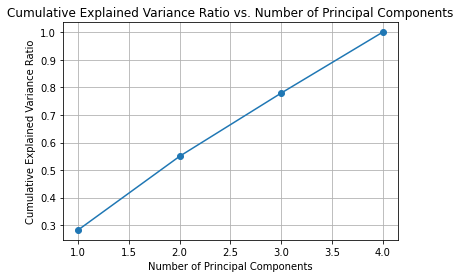

In [13]:
import matplotlib.pyplot as plt


# Create a sample dataset
data = {
    'height': np.random.uniform(150, 190, 100),
    'weight': np.random.uniform(50, 90, 100),
    'age': np.random.uniform(18, 60, 100),
    'gender': np.random.choice(['Male', 'Female'], 100),
    'blood_pressure': np.random.uniform(90, 140, 100),
}

df = pd.DataFrame(data)

# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=[np.object]).columns.tolist()

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Encode categorical features (if needed)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(df[numerical_features])

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()
